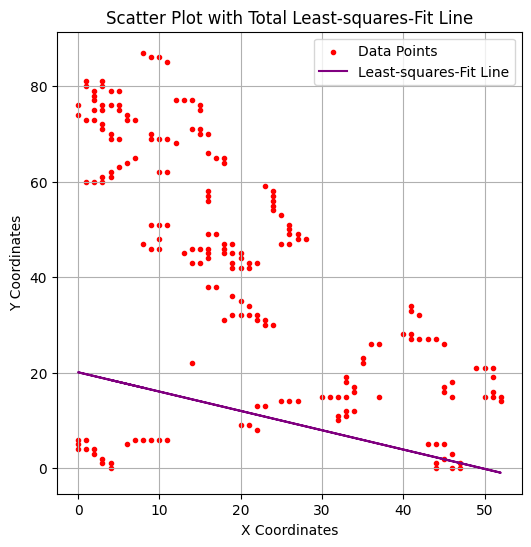

In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

edges = cv.Canny(img, 550, 690)
indices = np.where(edges != [0])

x = indices[1]
y = indices[0]
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
slope = coefficients[0]

data_matrix = np.vstack([x, y]).T
center_point = np.mean(data_matrix, axis=0)
data_centeroid = data_matrix - center_point

U, S, vt = np.linalg.svd(data_centeroid, full_matrices=False)
angle = -vt[0, 0] / vt[1, 0]
interception_point = np.array([1, 0]) @ center_point

fitted_tls_line = angle * x + interception_point

plt.figure(figsize=(6, 6))
plt.scatter(x, y, marker='.', color='red', label='Data Points')
plt.plot(x, fitted_tls_line, color='purple', label='Least-squares-Fit Line')
plt.title('Scatter Plot with Total Least-squares-Fit Line')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.legend()
plt.grid(True)
plt.show()




